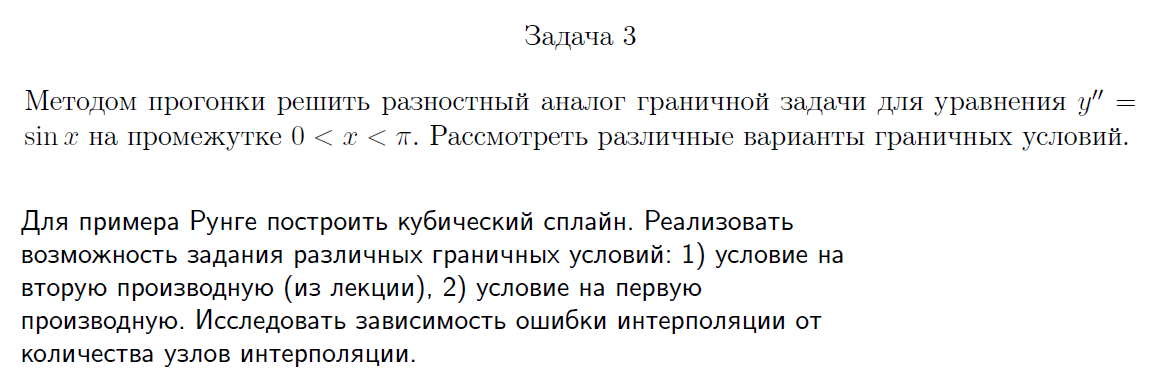

In [1]:
import numpy as np
import numpy
import matplotlib.pyplot as plt

In [106]:
def tridiagonal_algorithm(A, B, C, F, y_0, y_n):
    n = len(F)
    alpha = np.zeros(n)
    betha = np.zeros(n)
    y     = np.zeros(n)
    alpha[0] = -C[0] / B[0]
    betha[0] = y_0 * B[0]
    for i in np.arange(1, n - 1):
        denom    = B[i] + A[i-1] * alpha[i-1]
        alpha[i] = -C[i] / denom
        betha[i] = (F[i] - A[i-1] * betha[i-1]) / denom
    y[-1] = (y_n - A[-1]*betha[n-2])/(1 + A[-1]*alpha[n-2])
    for i in np.arange(n - 2, -1, -1):
        y[i] = alpha[i] * y[i+1] + betha[i]
    return y

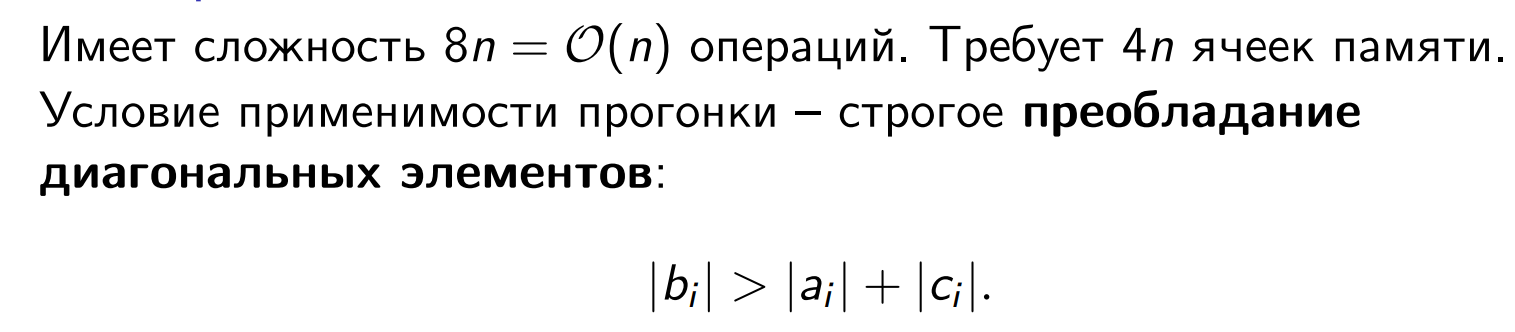

In [243]:
def create_diagonals(n):
    A, B, C = np.ones(n-1), (-2)*np.ones(n), np.ones(n-1)   
    B[0] = 1 
    C[0] = 0 
    B[-1] = 1 
    A[-1] = 0 
    return A, B, C

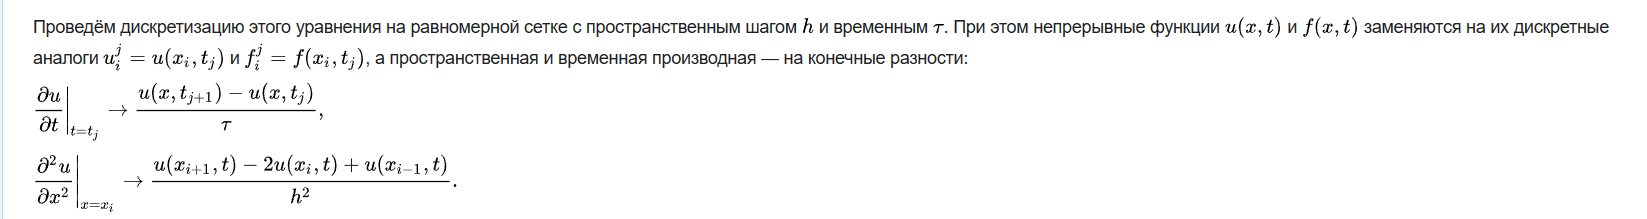

In [75]:
n = 1000
h = np.pi/(n-1)
y_0 = 0
y_n = 0

A, B, C = create_diagonals(n)
np.diag(A, k=-1) + np.diag(B) + np.diag(C, k=1)

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [76]:
x = np.linspace(0, np.pi, n)
f = np.sin(x)*(h**2)

## Аналитическое решение ##

In [77]:
def exact_solution_1(x):
    return - np.sin(x) # для гран условий y'(0) = 1

In [78]:
def solution(n):
    x_values = np.linspace(0, np.pi, n)
    exact_solution = exact_solution_1(x_values)
    return exact_solution

In [79]:
progonka = tridiagonal_algorithm(A, B, C, f, y_0, y_n)
exact_solution = solution(n)

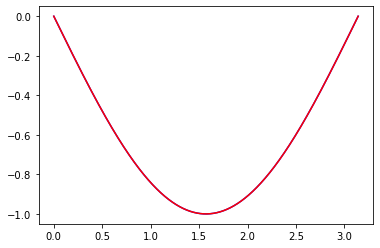

In [80]:
plt.plot(x, exact_solution, color='b')
plt.plot(x, progonka, color='r')
plt.show()

In [81]:
def fault(a,b):
    n = len(a)
    fault = np.zeros(n)
    for i in range(n):
        fault[i] = abs(a[i] + b[i])
    return fault  

In [82]:
a = fault(progonka, exact_solution)
print(max(abs(a)))

1.999998351770644


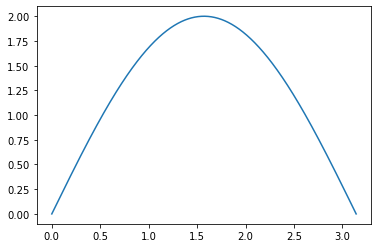

In [83]:
plt.plot(x, a)

In [84]:
tmp = np.zeros(len(x))
for i, val in enumerate(x):
    tmp[i] = np.abs(np.sin(val)+progonka[i])
tmp = np.zeros(4)
for i in range(1, 5):
    h = np.pi/((10**i)-1)
    A, B, C = create_diagonals(10**i)
    x = np.linspace(0, np.pi, 10**i)
    f = np.sin(x)*(h**2)
    progonka = tridiagonal_algorithm(A, B, C, f, y_0, y_n)
    tmp[i-1] = np.max(np.abs(np.sin(x)+progonka))

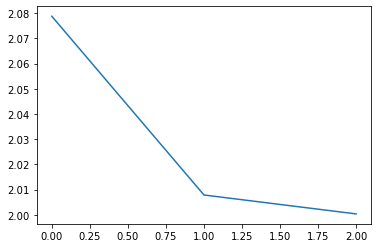

In [85]:
res = np.log10(tmp[:-1]/tmp[1:])
plt.plot(res)
plt.show()

In [249]:
def create_diagonals(n):
    A, B, C = np.ones(n-1), (-2)*np.ones(n), np.ones(n-1)   
    B[0] = -1 
    C[0] = 1
    B[-1] = 1 
    A[-1] = 0 
    return A, B, C

In [255]:
n = 10000
h = np.pi/(n-1)
y_0 = 1*h
y_n = 0

A, B, C = create_diagonals(n)
np.diag(A, k=-1) + np.diag(B) + np.diag(C, k=1)

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [256]:
x = np.linspace(0, np.pi, n)
f = np.sin(x)*(h**2)

In [257]:
def exact_solution_1(x):
    return - np.sin(x) # для гран условий y'(0) = 1
def solution(n):
    x_values = np.linspace(0, np.pi, n)
    exact_solution = exact_solution_1(x_values)
    return exact_solution

In [258]:
progonka = tridiagonal_algorithm(A, B, C, f, y_0, y_n)
exact_solution = solution(n)
print(progonka)

[-6.28318528e+00 -6.28287109e+00 -6.28255690e+00 ... -1.88514407e-03
 -9.42572048e-04  0.00000000e+00]


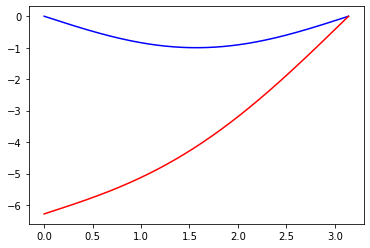

In [259]:
plt.plot(x, exact_solution, color='b')
plt.plot(x, progonka, color='r')
plt.show()